In [192]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

def read_image(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def save_image(array, path, file_name):
    if array.dtype != np.uint8:
        array = ((array - array.min()) / (array.max() - array.min()) * 255).astype('uint8')

    image = Image.fromarray(array)

    if not os.path.exists(path):
        os.makedirs(path)

    full_path = os.path.join(path, file_name)
    image.save(full_path, 'PNG')
    print(f"Image saved at {full_path}")

def display_image(array):
    plt.imshow(array, cmap='gray')
    plt.axis('off')
    plt.show()

def perform_dilation(array, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    eroded_array = cv2.erode(array, kernel, iterations=1)
    print("\n Dilation - Kernel: ",kernel_size)
    display_image(eroded_array)
    print(" ")
    return eroded_array

def perform_erosion(array, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    dilated_array = cv2.dilate(array, kernel, iterations=1)
    print("\n Erosion - Kernel: ",kernel_size)
    display_image(dilated_array)
    print(" ")
    return dilated_array

def convolve_with_upward_slant_line(array, kernel_size):
    kernel = np.fliplr(np.eye(kernel_size, dtype=np.float32))
    result = cv2.filter2D(array, -1, kernel, borderType=cv2.BORDER_REPLICATE)
    print("\n Upward_Line_Convolution - Kernel: ",kernel_size)
    display_image(result)
    print(" ")
    return result


def convolve_with_downward_slant_line(array, kernel_size):
    kernel = np.eye(kernel_size, dtype=np.float32)
    result = cv2.filter2D(array, -1, kernel, borderType=cv2.BORDER_REPLICATE)
    print("\n Downward_Line_Convolution - Kernel: ",kernel_size)
    display_image(result)
    print(" ")
    return result


def convolve_with_vertical_line(array, kernel_size):
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    kernel[:, kernel_size // 2] = 1
    result = cv2.filter2D(array, -1, kernel, borderType=cv2.BORDER_REPLICATE)
    print("\n Vertical_Line_Convolution - Kernel: ",kernel_size)
    display_image(result)
    print(" ")
    return result


def convolve_with_horizontal_line(array, kernel_size):
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    kernel[kernel_size // 2, :] = 1
    result = cv2.filter2D(array, -1, kernel, borderType=cv2.BORDER_REPLICATE)
    print("\n Horizontal_Line_Convolution - Kernel: ",kernel_size)
    display_image(result)
    print(" ")
    return result

def add_images(matrix1, matrix2):
    matrix1 = -1*matrix1 + 255
    matrix2 = -1*matrix2 + 255
    result = matrix1 + matrix2
    result = np.where(result > 255, 255, result)
    result = -1*result
    print("\n Addition")
    display_image(result)
    print(" ")
    return result

# INCHI2


 inchi2 



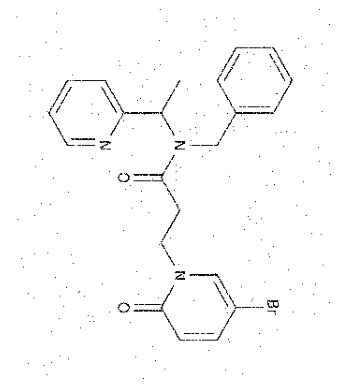

In [193]:
inchi2 = read_image("Original_Images/Chemical_Structures/inchi2.png")
print("\n inchi2 \n")
display_image(inchi2)

#### Dilation + Erosion


 Dilation - Kernel:  3


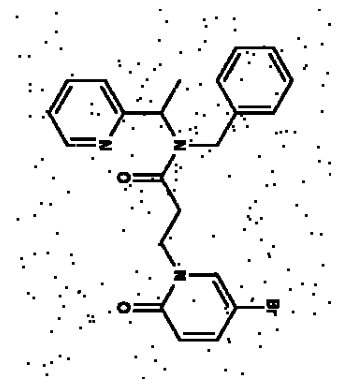

 

 Erosion - Kernel:  3


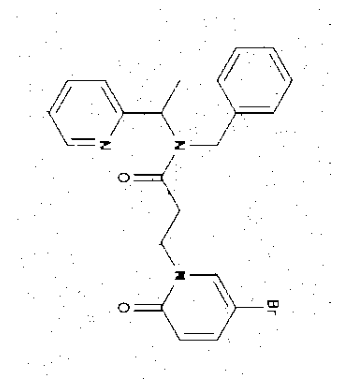

In [205]:
inchi2_1 = perform_dilation(inchi2,3)
inchi2_2 = perform_erosion(inchi2_1,3)

In [206]:
save_image(inchi2_2, 'Results/Chemical_Structures_Results/inchi2', 'inchi2_dilation_erosion.png')

Image saved at Results/Chemical_Structures_Results/inchi2/inchi2_dilation_erosion.png


#### Addition of Vertical Line and Horizontal Line Convolution


 Horizontal_Line_Convolution - Kernel:  2


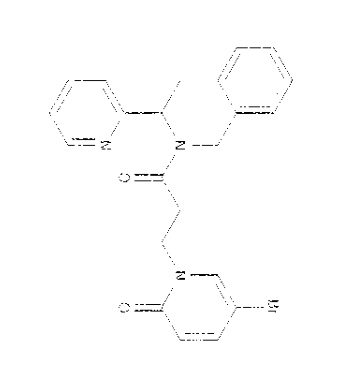

 

 Vertical_Line_Convolution - Kernel:  2


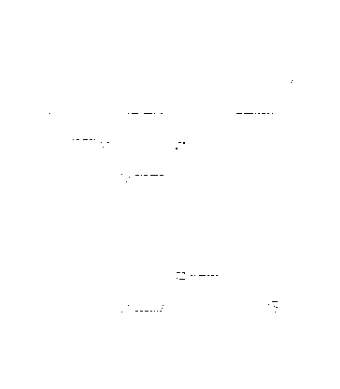

 

 Addition


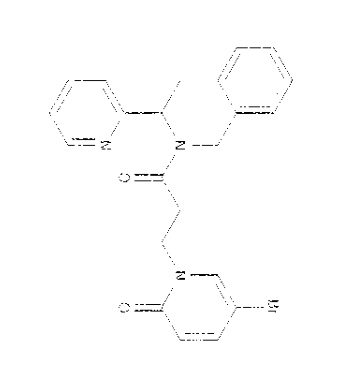

In [211]:
inchi2_1 = convolve_with_horizontal_line(inchi2,2)
inchi2_2 = convolve_with_vertical_line(inchi2_1,2)
inchi2_3 = add_images(inchi2_1, inchi2_2)

In [212]:
save_image(inchi2_3, 'Results/Chemical_Structures_Results/inchi2', 'inchi2_horizontal_vertical.png')

Image saved at Results/Chemical_Structures_Results/inchi2/inchi2_horizontal_vertical.png


#### Complex Cleaning+Restoration
Addition of Horizontal and Vertical + Dilation


 Horizontal_Line_Convolution - Kernel:  2


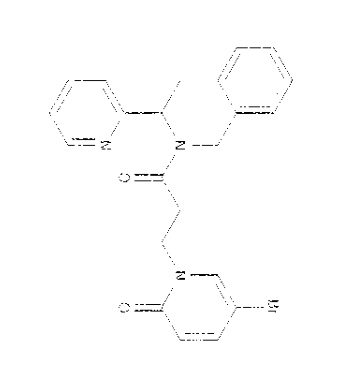

 

 Vertical_Line_Convolution - Kernel:  2


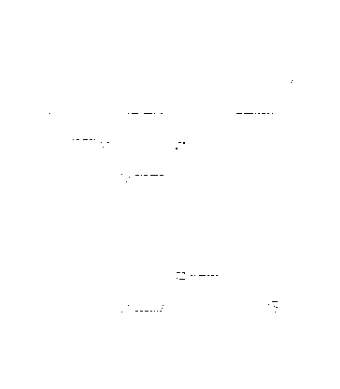

 

 Addition


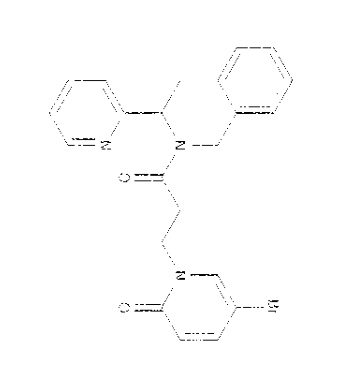

 

 Dilation - Kernel:  2


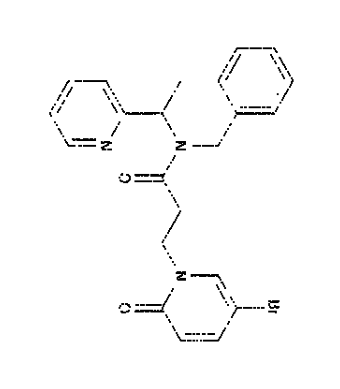

 

 Dilation - Kernel:  2


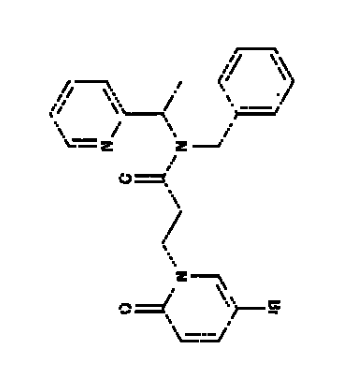

In [267]:
inchi2_1 = convolve_with_horizontal_line(inchi2,2)
inchi2_2 = convolve_with_vertical_line(inchi2_1,2)
inchi2_3 = add_images(inchi2_1, inchi2_2)
inchi2_4 = perform_dilation(inchi2_3,2)
inchi2_5 = perform_dilation(inchi2_4,2)

In [216]:
save_image(inchi2_5, 'Results/Chemical_Structures_Results/inchi2', 'inchi2_complex.png')

Image saved at Results/Chemical_Structures_Results/inchi2/inchi2_complex.png


# INCHI6


 inchi6 



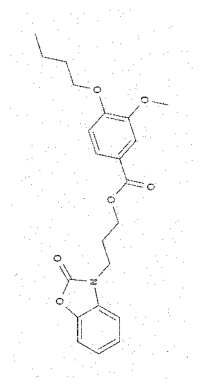

In [217]:
inchi6 = read_image("Original_Images/Chemical_Structures/inchi6.png")
print("\n inchi6 \n")
display_image(inchi6)

#### Dilation + 3 x Erosion


 Dilation - Kernel:  4


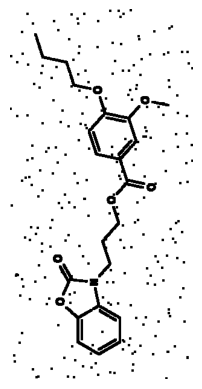

 

 Erosion - Kernel:  2


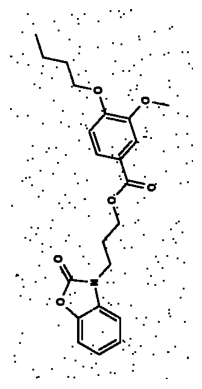

 

 Erosion - Kernel:  2


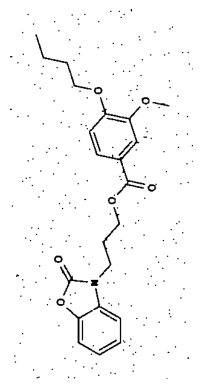

 

 Erosion - Kernel:  2


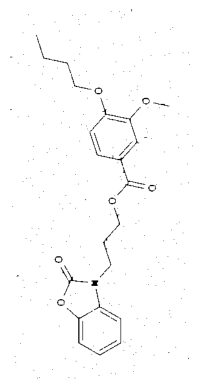

In [235]:
inchi6_1 = perform_dilation(inchi6,4)
inchi6_2 = perform_erosion(inchi6_1,2)
inchi6_3 = perform_erosion(inchi6_2,2)
inchi6_4 = perform_erosion(inchi6_3,2)

In [236]:
save_image(inchi6_4, 'Results/Chemical_Structures_Results/inchi6', 'inchi6_dilation_3_X_erosion.png')

Image saved at Results/Chemical_Structures_Results/inchi6/inchi6_dilation_3_X_erosion.png


#### Addition of Vertical Line and Horizontal Line Convolution


 Horizontal_Line_Convolution - Kernel:  2


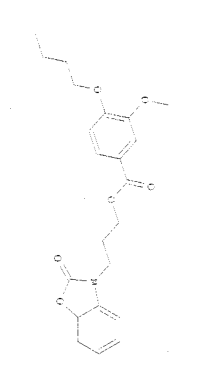

 

 Vertical_Line_Convolution - Kernel:  2


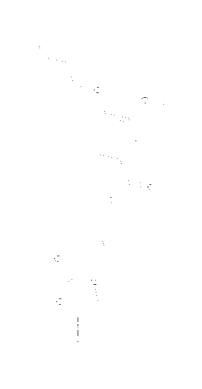

 

 Addition


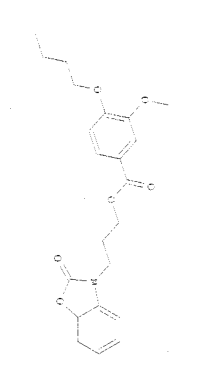

In [230]:
inchi6_1 = convolve_with_horizontal_line(inchi6,2)
inchi6_2 = convolve_with_vertical_line(inchi6_1,2)
inchi6_3 = add_images(inchi6_1, inchi6_2)

In [231]:
save_image(inchi6_3, 'Results/Chemical_Structures_Results/inchi6', 'inchi6_horizontal_vertical_convolution.png')

Image saved at Results/Chemical_Structures_Results/inchi6/inchi6_horizontal_vertical_convolution.png


#### Complex Cleaning+Recovery
Addition of Horizontal and Vertical convolutions and Dilation


 Horizontal_Line_Convolution - Kernel:  2


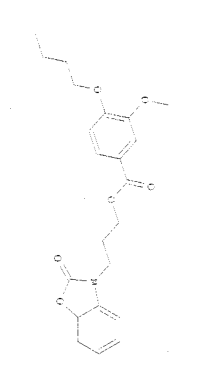

 

 Vertical_Line_Convolution - Kernel:  2


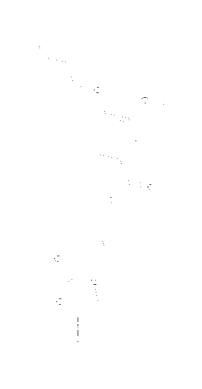

 

 Addition


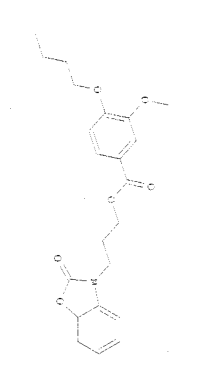

 

 Dilation - Kernel:  3


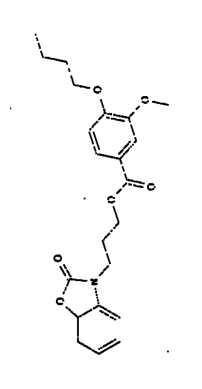

In [270]:
inchi6_1 = convolve_with_horizontal_line(inchi6,2)
inchi6_2 = convolve_with_vertical_line(inchi6_1,2)
inchi6_3 = add_images(inchi6_1, inchi6_2)
inchi6_4 = perform_dilation(inchi6_3, 3)

In [271]:
save_image(inchi6_4, 'Results/Chemical_Structures_Results/inchi6', 'inchi6_complex_cleaning.png')

Image saved at Results/Chemical_Structures_Results/inchi6/inchi6_complex_cleaning.png


# INCHI7


 inchi7 



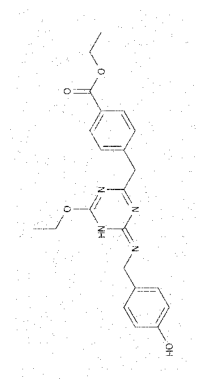

In [272]:
inchi7 = read_image("Original_Images/Chemical_Structures/inchi7.png")
print("\n inchi7 \n")
display_image(inchi7)

#### Dilation + 2 x Erosion


 Dilation - Kernel:  4


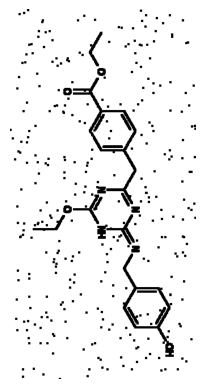

 

 Erosion - Kernel:  3


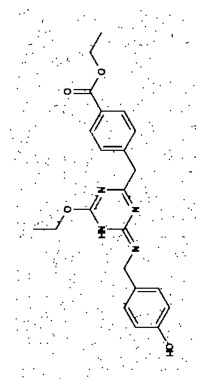

 

 Erosion - Kernel:  2


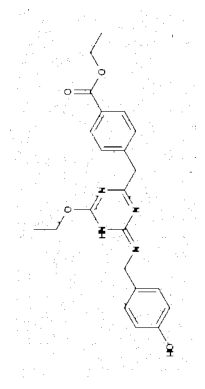

In [273]:
inchi7_1 = perform_dilation(inchi7,4)
inchi7_2 = perform_erosion(inchi7_1,3)
inchi7_3 = perform_erosion(inchi7_2,2)

In [274]:
save_image(inchi7_3, 'Results/Chemical_Structures_Results/inchi7', 'inchi7_dilation_2_x_erosion.png')

Image saved at Results/Chemical_Structures_Results/inchi7/inchi7_dilation_2_x_erosion.png


#### Addition of Vertical Line and Horizontal Line Convolution


 Horizontal_Line_Convolution - Kernel:  2


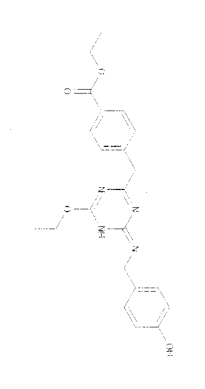

 

 Vertical_Line_Convolution - Kernel:  2


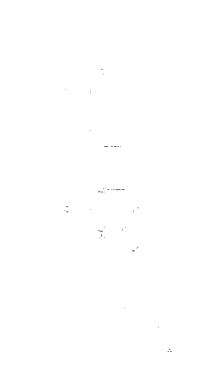

 

 Addition


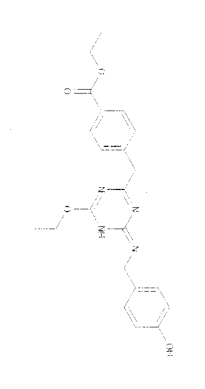

In [275]:
inchi7_1 = convolve_with_horizontal_line(inchi7,2)
inchi7_2 = convolve_with_vertical_line(inchi7_1,2)
inchi7_3 = add_images(inchi7_1, inchi7_2)

In [276]:
save_image(inchi7_3, 'Results/Chemical_Structures_Results/inchi7', 'inchi7_horizontal_vertical.png')

Image saved at Results/Chemical_Structures_Results/inchi7/inchi7_horizontal_vertical.png


#### Complex Cleaning+Restoration
Addition of Vertical and Horizontal convolutions and Dilation


 Horizontal_Line_Convolution - Kernel:  2


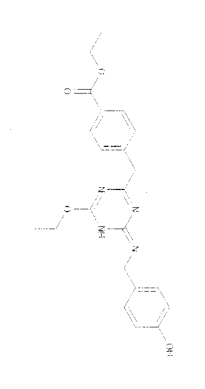

 

 Vertical_Line_Convolution - Kernel:  2


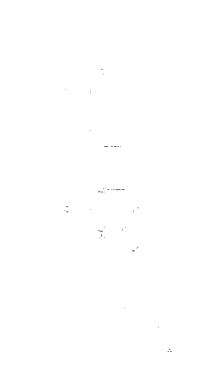

 

 Addition


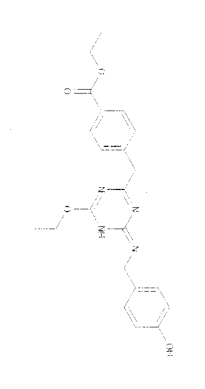

 

 Dilation - Kernel:  3


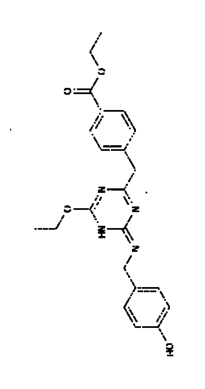

In [279]:
inchi7_1 = convolve_with_horizontal_line(inchi7,2)
inchi7_2 = convolve_with_vertical_line(inchi7_1,2)
inchi7_3 = add_images(inchi7_1, inchi7_2)
inchi7_4 = perform_dilation(inchi7_3,3)

In [280]:
save_image(inchi7_4, 'Results/Chemical_Structures_Results/inchi7', 'inchi7_complex.png')

Image saved at Results/Chemical_Structures_Results/inchi7/inchi7_complex.png
